In [17]:
# Import libraries used for the Project
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv")
y_val = pd.read_csv("y_val.csv")
y_test = pd.read_csv("y_test.csv")

In [3]:
# Choose the number of features
top6_features = ['Rain_mm', 'RH_9am', 'RH_3pm', 'Temp_3pm', 'Max_Temp', 'Temp_9am']

PART 6 - DECISION TREE

6.1 First Hyperparametres tunning 

In [42]:
# Now we are going to work with our decision tree, from the initial plot we can see that it can easily overfit the model, we are going to use the GridsearchCV
# But in this case we will keep a small tree
parametres = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'max_leaf_nodes': [2, 6, 8],
    'min_samples_leaf': [50, 75, 100],
}

# I'm playing careful for not overfitting the tree, I also want to start mellow and see what happnes 

In [43]:
# Now we test the parametres
d_tree = DecisionTreeClassifier()

# Start the Gridsearch
grid_search = GridSearchCV(d_tree, parametres, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'max_leaf_nodes': [2, 6, 8],
                         'min_samples_leaf': [50, 75, 100]})

In [44]:
# Look at the results 
print("Parameters: ", grid_search.best_params_)
print("Score: ", grid_search.best_score_)

# Results
# Parameters:  {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 50}
# Score:  0.9847634145283471

Parameters:  {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 50}
Score:  0.9847634145283471


6.2 Tree Visualisation

In [123]:
# We fit the tree with the parametres 
d_tree_simple = DecisionTreeClassifier(criterion= 'gini', max_depth = 2, max_leaf_nodes= 2, min_samples_leaf= 50)
d_tree_simple.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, min_samples_leaf=50)

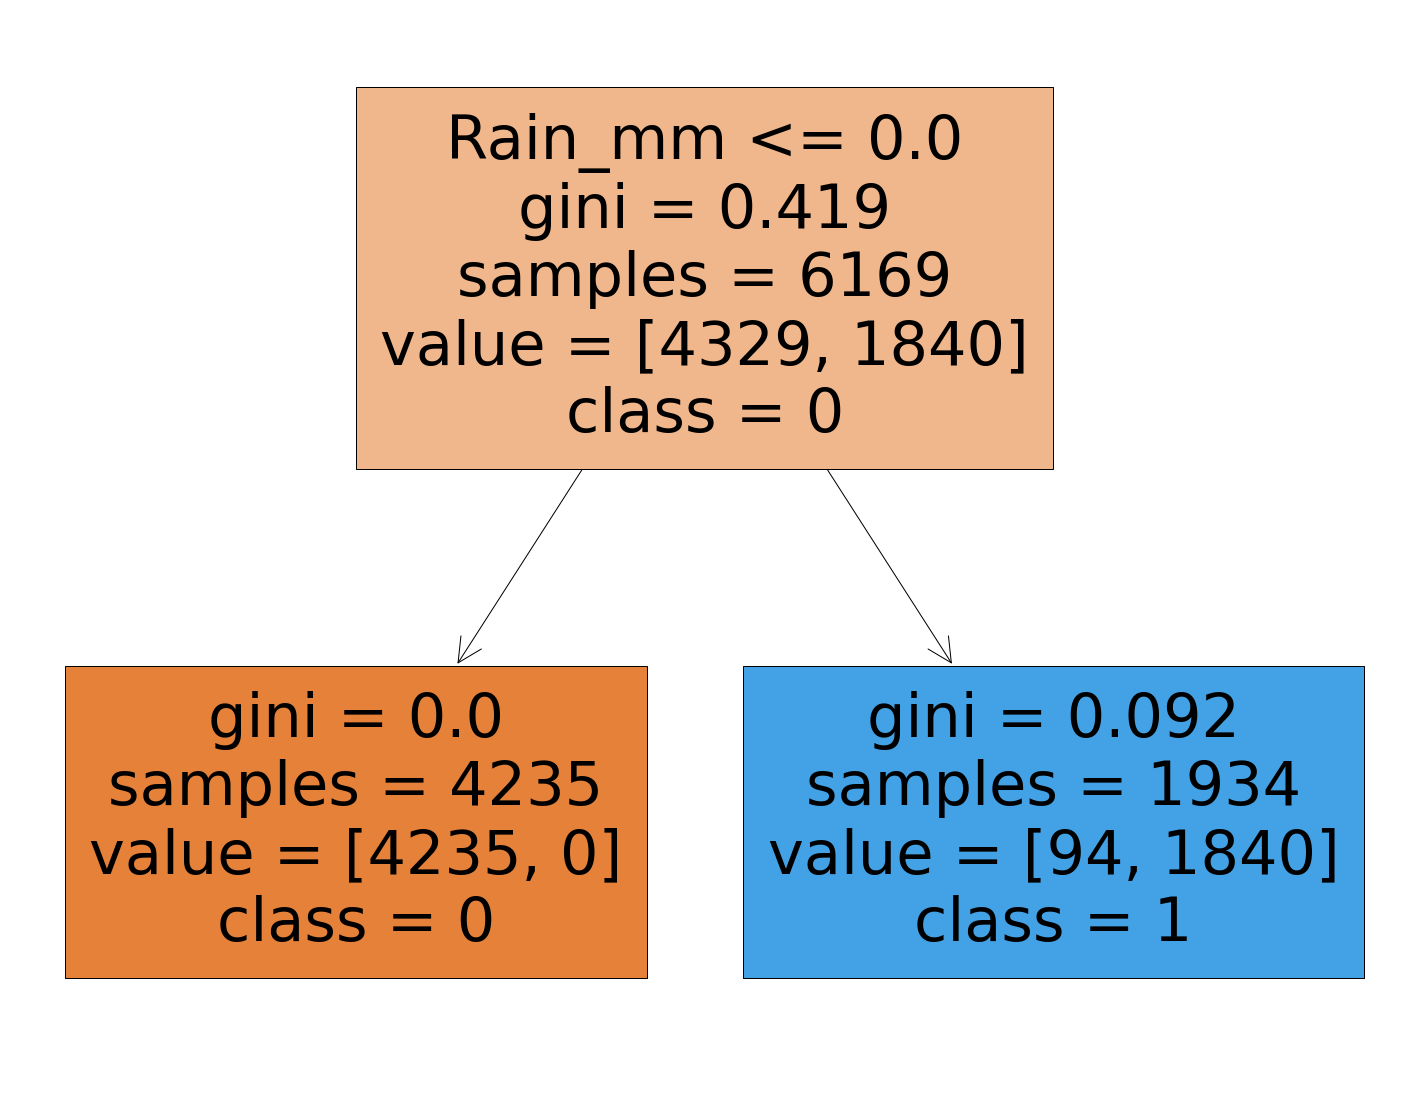

In [78]:
# We get a result
tree_fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(d_tree_simple, feature_names= list(X_train.columns), class_names=['0', '1'], filled=True)

6.3 Continue Parametre Tunning

In [136]:
# In the last tree we only used one feature, Rain mm, by looking at the diagram we can see that 94 samples will be incorrectly label as raining.
# I will try a more advance tree and I will start working with the Validation set

parametres = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6],
    'max_leaf_nodes': [6, 8, 10, 12],
}

# Now we test the parametres
d_tree_complx = DecisionTreeClassifier()

# Start the Gridsearch
grid_search = GridSearchCV(d_tree_complx, parametres, cv=5)
grid_search.fit(X_train, y_train)

# Look at the results 
print("Parameters: ", grid_search.best_params_)
print("Score: ", grid_search.best_score_)

Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 6}
Score:  0.9967578516774649


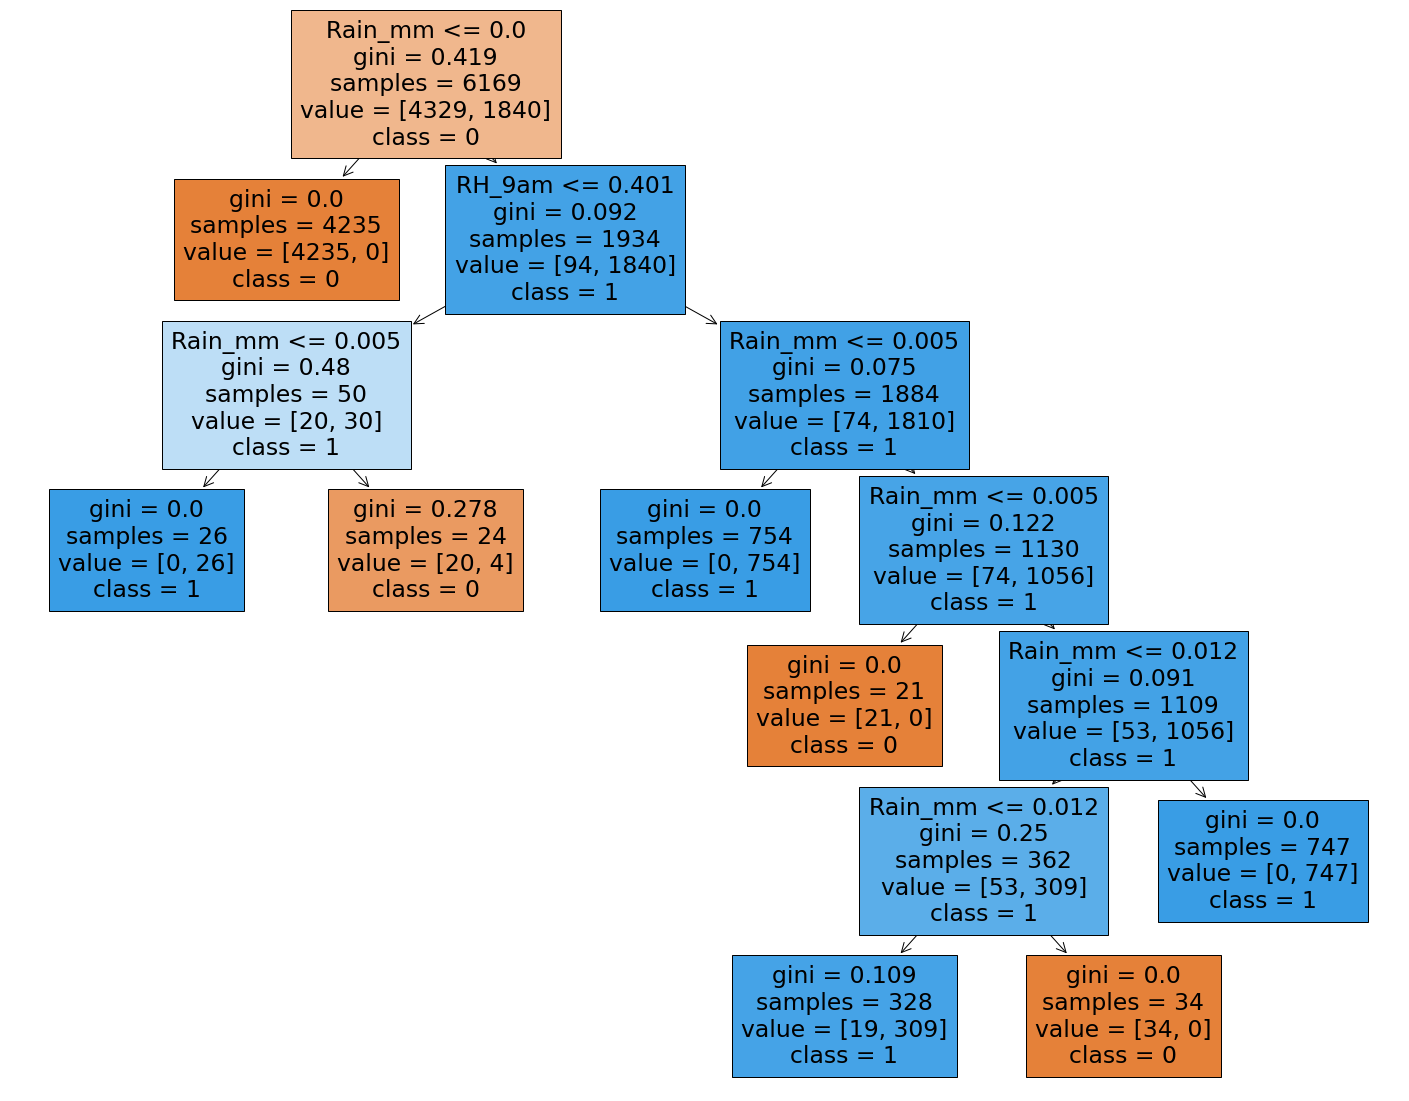

In [143]:
# We fit the tree with the parametres 
d_tree_complx = DecisionTreeClassifier(criterion= 'gini', max_depth = 6, max_leaf_nodes= 10, min_samples_leaf= 20, fea)
d_tree_complx.fit(X_train, y_train)



# We get a result
tree_fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(d_tree_complx, feature_names= list(X_train.columns), class_names=['0', '1'], filled=True)

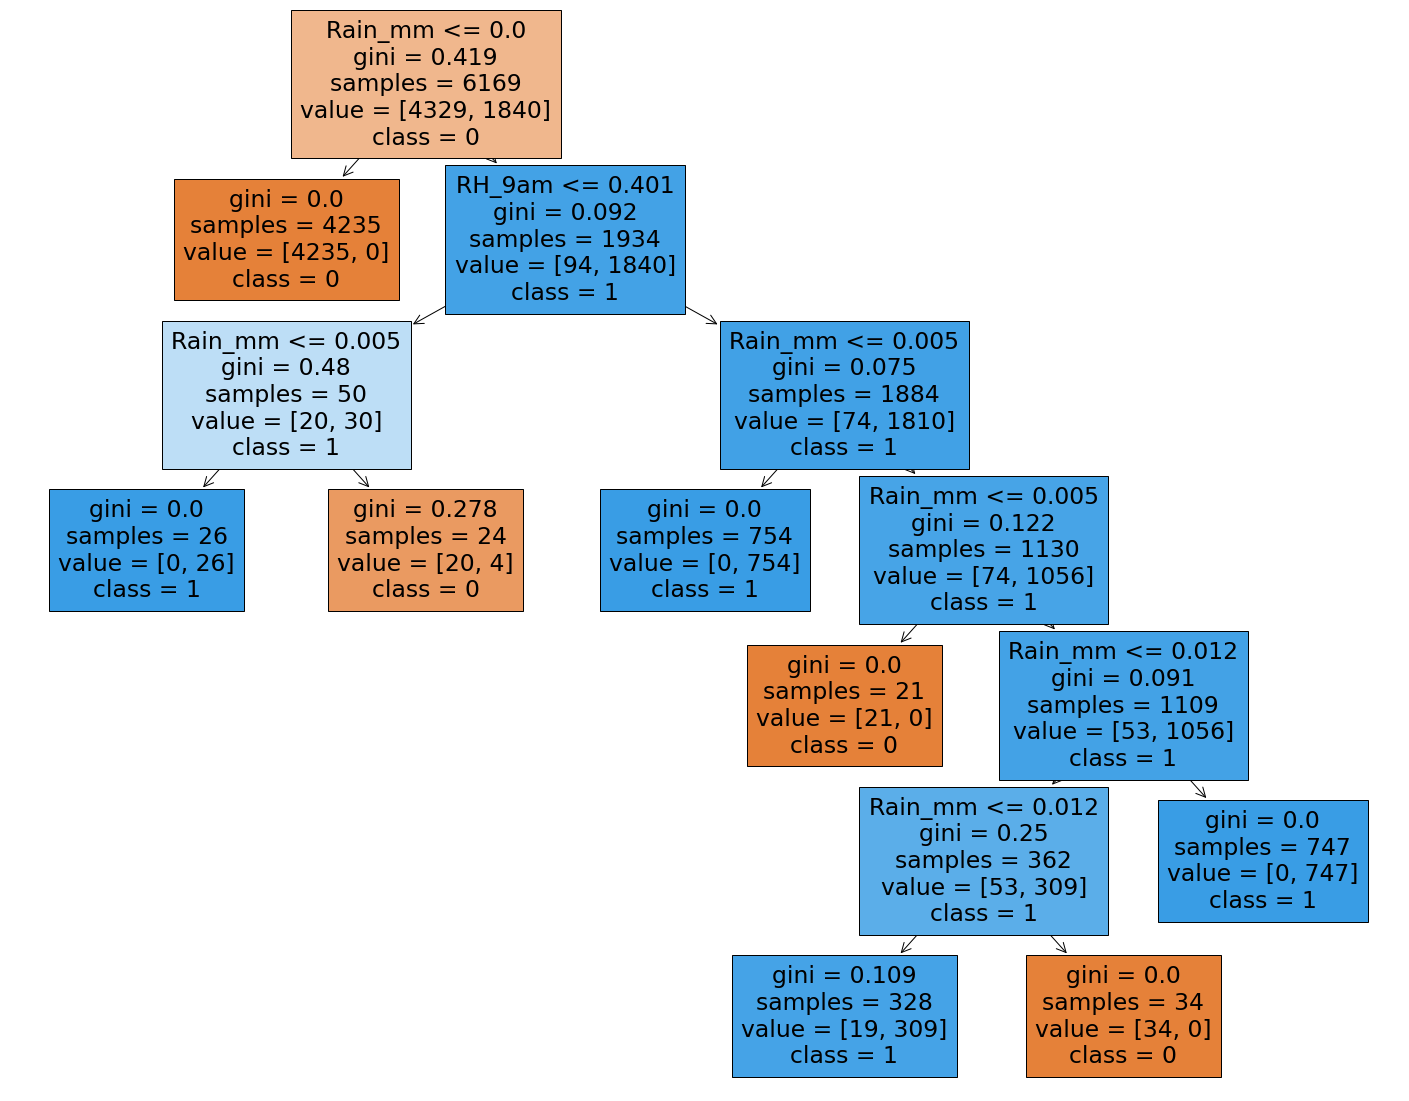

In [144]:
# We fit the tree with the parametres 
d_tree_def = DecisionTreeClassifier()
d_tree_def.fit(X_train, y_train)



# We get a result
tree_fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(d_tree_complx, feature_names= list(X_train.columns), class_names=['0', '1'], filled=True)

In [145]:
# Compare simple vs complex (not to complex) vs default settings (probably overfitting)
print(accuracy_score(y_val, d_tree_simple.predict(X_val)))
print(accuracy_score(y_val, d_tree_complx.predict(X_val)))
print(accuracy_score(y_val, d_tree_def.predict(X_val)))

0.9864275327193408
0.9961221522055259
0.9990305380513815


In [146]:
sns.dot

<module 'seaborn' from 'c:\\Users\\jmanu\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>